In [15]:
df

,rid,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B,ASAH1,RALA,ARHGEF12,...,E,F,G,H,J,L,M,N,Q,S
0,AML001_CD34_6H:BRD-K43389675:10,0.004217,-0.018644,0.019958,-0.056607,-0.017211,-0.040410,-0.012175,-0.013127,-0.006405,...,0,0,0,0,0,0,0,0,0,0
1,AML001_PC3_6H:BRD-A45664787:10,-0.000762,-0.000233,0.003371,0.004516,0.009972,0.130947,-0.024684,0.017885,0.023541,...,0,0,0,0,0,0,0,0,0,0
2,AML001_PC3_6H:BRD-K43389675:0.37037,0.004243,-0.019425,-0.009953,0.009629,0.003882,0.026752,0.007623,-0.001681,0.003181,...,0,0,0,0,0,0,0,0,0,0
3,AML001_PC3_6H:BRD-K43389675:1.11111,0.012194,-0.011197,0.001302,-0.005428,0.014864,0.036932,0.023810,0.020200,-0.023778,...,0,0,0,0,0,0,0,0,0,0
4,AML001_PC3_6H:BRD-K43389675:10,0.021779,0.023403,0.009063,-0.047680,0.024381,0.028317,0.027444,-0.001547,-0.014821,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,RAD001_PC3_6H:BRD-K57545991-050-16-5:0.0412,0.015486,0.007536,-0.017094,-0.009062,-0.001840,0.032501,0.017804,0.034829,-0.000637,...,0,0,0,0,0,0,0,0,0,0
4058,RAD001_PC3_6H:BRD-K57569181-001-16-8:0.0015,-0.007766,0.026815,-0.009391,0.001375,0.027642,0.038197,0.038286,0.013352,-0.008032,...,0,0,0,0,0,0,0,0,0,0
4059,RAD001_PC3_6H:BRD-K64052750-001-04-3:10,0.004797,-0.014972,-0.006059,0.002318,0.006356,-0.042466,0.007357,0.028211,0.026124,...,0,0,0,0,0,0,0,0,0,0
4060,RAD001_PC3_6H:BRD-K84937637-001-03-2:0.1235,-0.001343,0.022330,0.011539,0.005044,0.017594,0.009275,-0.007178,-0.028721,0.033979,...,0,0,0,0,0,0,0,1,0,0


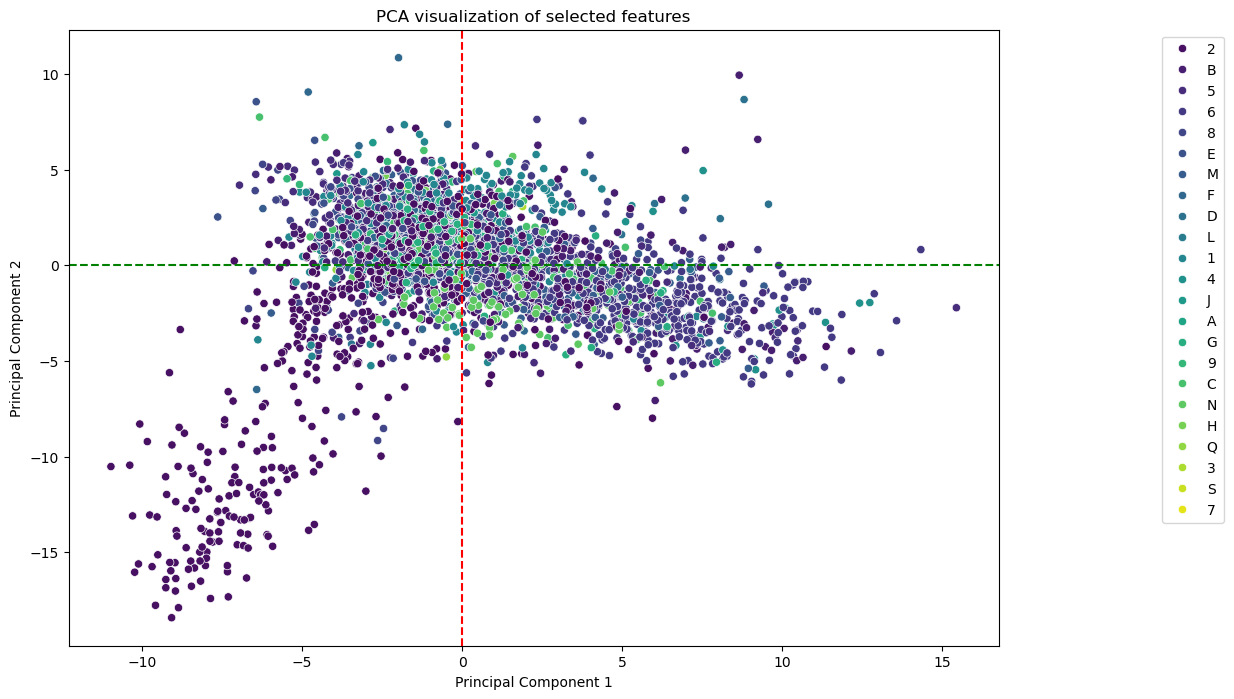

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/data4/msc23104470/simplified_gene_expression_data.csv')

# Separate features and target
X = df.iloc[:, 1:979]  # Exclude 'rid' and 'Original_ICD-11' columns, select gene features
y = df.iloc[:, 980:]   # MultiLabelBinarizer classes

# Combine multi-label classes into a single string for coloring
y_combined = y.apply(lambda row: ','.join(row.index[row == 1].tolist()), axis=1)

# Number of top features to select
k = 250

# Select K Best features using f_classif score function
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y_combined)

# Perform PCA on the selected features
# Scale the selected features before applying PCA
X_selected_scaled = (X_selected - X_selected.mean(axis=0)) / X_selected.std(axis=0)

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the scaled features
X_pca = pca.fit_transform(X_selected_scaled)

# Convert the PCA results into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the combined labels to the PCA dataframe
pca_df['Labels'] = y_combined

# Plot PCA results
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='PC1', y='PC2', hue='Labels', data=pca_df, palette='viridis')

plt.title('PCA visualization of selected features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding vertical and horizontal lines
plt.axvline(x=0, color='r', linestyle='--')  # Vertical line at x=0
plt.axhline(y=0, color='g', linestyle='--')  # Horizontal line at y=0

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()